In [1]:
!pip install SpeechRecognition pyaudio opencv-python mediapipe tensorflow

  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.1
    Uninstalling protobuf-5.29.1:
      Successfully uninstalled protobuf-5.29.1


In [2]:
import speech_recognition as sr
import cv2
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np


In [3]:
# Initialize the recognizer
recognizer = sr.Recognizer()

def recognize_speech_from_mic():
    with sr.Microphone() as source:
        print("Please say something...")
        audio = recognizer.listen(source)

        try:
            # Recognize speech using Google Web Speech API
            print("Recognizing...")
            command = recognizer.recognize_google(audio)
            print(f"You said: {command}")
            return command
        except sr.UnknownValueError:
            print("Sorry, I did not understand that.")
            return None
        except sr.RequestError:
            print("Sorry, the service is down.")
            return None

# Test the speech recognition function
recognized_text = recognize_speech_from_mic()


Please say something...
Recognizing...
Sorry, I did not understand that.


In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='google.protobuf')


In [ ]:
import cv2
import mediapipe as mp

# Initialize MediaPipe Hands module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(min_detection_confidence=0.2, min_tracking_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Start webcam
cap = cv2.VideoCapture(0)

# Example Gesture Recognition Functions:
def check_thumbs_up(landmarks):
    # Example logic to detect a thumbs-up gesture based on landmark positions
    thumb_tip = landmarks[4]  # Thumb tip landmark
    index_finger_tip = landmarks[8]  # Index finger tip landmark
    if thumb_tip.y < index_finger_tip.y:  # Condition for thumbs up
        return True
    return False

def check_peace_sign(landmarks):
    # Example logic to detect a peace sign gesture based on landmark positions
    thumb_tip = landmarks[4]
    index_finger_tip = landmarks[8]
    middle_finger_tip = landmarks[12]
    if thumb_tip.y > index_finger_tip.y and middle_finger_tip.y > index_finger_tip.y:
        return True
    return False

def check_fist(landmarks):
    # Example logic to detect a fist gesture based on landmark positions
    thumb_tip = landmarks[4]
    index_finger_tip = landmarks[8]
    if thumb_tip.y > index_finger_tip.y:  # Condition for a fist
        return True
    return False

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert BGR image to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Process the frame for hand detection
    results = hands.process(frame_rgb)
    
    # If hands are detected, draw landmarks on the frame
    gesture = None
    if results.multi_hand_landmarks:
        for landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(frame, landmarks, mp_hands.HAND_CONNECTIONS)
            
            # Example gesture recognition: Check for a thumbs-up gesture
            if check_thumbs_up(landmarks.landmark):
                gesture = "Thumbs Up"
            elif check_peace_sign(landmarks.landmark):
                gesture = "Peace Sign"
            elif check_fist(landmarks.landmark):
                gesture = "Fist"
    
    # Add the detected gesture text to the frame if a gesture is recognized
    if gesture:
        cv2.putText(frame, gesture, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Display the frame
    cv2.imshow('Hand Gesture Recognition', frame)
    
    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


In [7]:
import zipfile
import os

# Path to the zip file
zip_file_path = 'asl_alphabet_test.zip'
extracted_folder = 'asl_alphabet_test'  # Name of the folder to extract to

# Check if folder exists, if not create it
if not os.path.exists(extracted_folder):
    os.makedirs(extracted_folder)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

print(f"Extracted {zip_file_path} to {extracted_folder}")


Extracted asl_alphabet_test.zip to asl_alphabet_test


In [10]:
pip install ipywidgets

^C
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB ? eta -:--:--
   ------------- -------------------------- 0.8/2.3 MB 2.6 MB/s eta 0:00:01
   -------------------------- ------------- 1.6/2.3 MB 3.0 MB/s eta 0:00:01
   ----------------------------------- ---- 2.1/2.3 MB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 3.0 MB/s eta 0:00:00


In [20]:
import os
import shutil

# Path to the parent folder containing the nested folder
parent_folder = 'asl_alphabet_test2'

# Check if the folder exists
if os.path.exists(parent_folder):
    # Get the contents of the parent folder
    folder_contents = os.listdir(parent_folder)
    
    # Check for subfolders
    for item in folder_contents:
        item_path = os.path.join(parent_folder, item)
        if os.path.isdir(item_path):  # Check if it's a folder
            # Create the destination path to avoid overwriting existing folder
            destination = item
            
            # Check if the destination folder already exists
            if os.path.exists(destination):
                print(f"Folder '{destination}' already exists. Renaming the folder to avoid conflict.")
                # Rename the folder by appending '_copy' to the folder name
                destination = item + '_copy'
            
            # Copy the subfolder to the target directory
            shutil.copytree(item_path, destination)
            print(f"Copied folder '{item}' to '{destination}'.")
else:
    print(f"Parent folder '{parent_folder}' not found.")


Folder 'asl_alphabet_test' already exists. Renaming the folder to avoid conflict.
Copied folder 'asl_alphabet_test' to 'asl_alphabet_test_copy'.


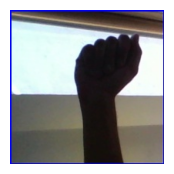

In [26]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the folder containing sign language images
asl_images_folder = "asl_alphabet_test_copy"

def display_sign_language_for_text(input_text):
    """
    Converts input text to sign language by displaying corresponding images.
    
    Args:
        input_text (str): Text to be converted to sign language.
    """
    input_text = input_text.upper()  # Convert to uppercase for consistency
    images = []
    
    # Iterate through each character in the text
    for char in input_text:
        if char.isalpha():  # Check if the character is a letter
            image_path = os.path.join(asl_images_folder, f"{char}_test.jpg")  # Adjusted naming convention
            if os.path.exists(image_path):
                img = Image.open(image_path)
                images.append(img)
            else:
                print(f"Image for '{char}' not found in {asl_images_folder}.")
        else:
            print(f"Ignoring non-alphabet character: {char}")
    
    # Display all images sequentially
    if images:
        fig, axes = plt.subplots(1, len(images), figsize=(len(images) * 2, 2))
        for i, img in enumerate(images):
            if len(images) == 1:
                axes.imshow(img)
                axes.axis("off")
            else:
                axes[i].imshow(img)
                axes[i].axis("off")
        plt.show()
    else:
        print("No valid letters to display in sign language.")

# Example usage
# Example usage with predefined input
input_text = "a"  # Replace with your desired text
display_sign_language_for_text(input_text)

